**Configure environment**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# **Question 1**

**Load File**


In [2]:
data=pd.read_csv('/kaggle/input/cse440/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
#B

vectorizer= CountVectorizer(stop_words='english')
x=vectorizer.fit_transform(data['review'])
y=data['sentiment']

In [4]:
x_print=x.toarray()
print(x_print)
print(y.values)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [5]:
#C

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
#D
#logictic_model

logistic_model= LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [7]:
#naive bayes model
naive_model=MultinomialNB()
naive_model.fit(X_train,y_train)

MultinomialNB()

In [8]:
logistic_model_pred=logistic_model.predict(X_test)
naive_pred=naive_model.predict(X_test)
logistic_accuracy=accuracy_score(y_test,logistic_model_pred)
naive_accuracy=accuracy_score(y_test,naive_pred)

print("Logistic regression accuracy: ",logistic_accuracy)
print("naive bayes accuracy", naive_accuracy)

Logistic regression accuracy:  0.883
naive bayes accuracy 0.8566


Logistic Regression has better accuracy in this scenario. It has comparatively higher accuracy even after running a lot of times. Here naive Bayes takes naive assumptions, whereas logistic doesn't. Logistic regression can also capture word dependencies and handle noisy data better ,which is another reason for its better performence .

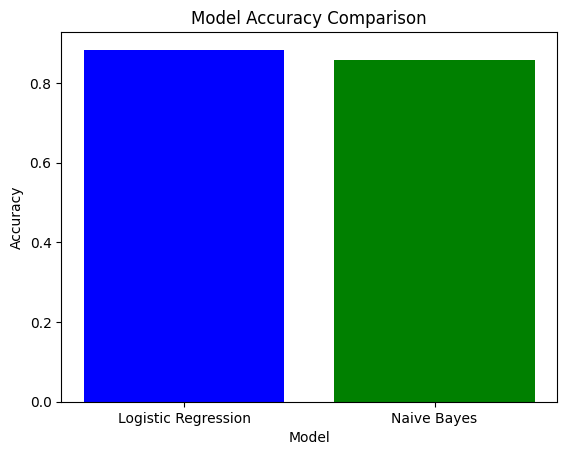

In [9]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logistic_accuracy, naive_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Question 2

In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['review'])
y = data['sentiment']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [12]:
#D
logistic_model= LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
#naive bayes model
naive_model=MultinomialNB()
naive_model.fit(X_train,y_train)

MultinomialNB()

In [14]:
logistic_model_pred=logistic_model.predict(X_test)
naive_pred=naive_model.predict(X_test)
lr_accuracy=accuracy_score(y_test,logistic_model_pred)
nb_accuracy=accuracy_score(y_test,naive_pred)
print(lr_accuracy,"  ",nb_accuracy)

0.8941    0.8654


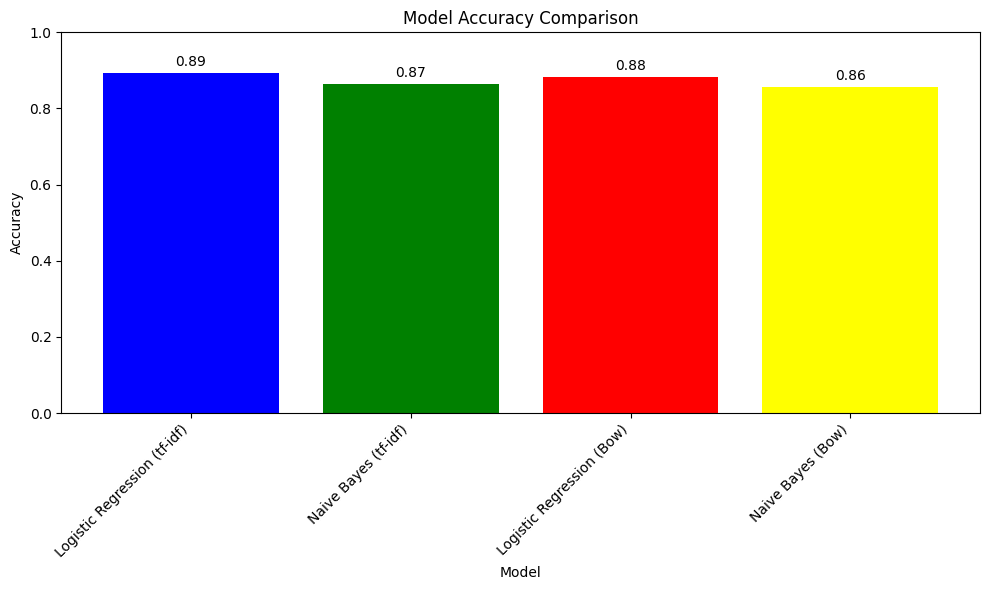

In [15]:
# Plot the accuracies
model_names = ['Logistic Regression (tf-idf)', 'Naive Bayes (tf-idf)', 'Logistic Regression (Bow)', 'Naive Bayes (Bow)']
accuracies = [lr_accuracy, nb_accuracy, logistic_accuracy, naive_accuracy]

plt.figure(figsize=(10, 6)) 
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'yellow'])
plt.ylim(0, 1)  
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


TF-IDF performs better here than BoW. it works better because it considers the importance of words in a document relative to the entire corpus, reducing the impact of frequently occurring but less informative words. Which helps the model to focus more on relevant context words

# Question 3

In [16]:
# !pip install tensorflow

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.layers import LSTM

df = pd.read_csv('/kaggle/input/cse440/IMDB Dataset.csv') 

MAX_NUM_WORDS = 10000  
MAX_SEQ_LENGTH = 100   
EMBEDDING_DIM = 100    


tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=MAX_SEQ_LENGTH)

y = df['sentiment'].map({'positive': 1, 'negative': 0}).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


embedding_index = {}
with open('/kaggle/input/cse440/glove.6B.100d.txt', encoding='utf-8') as f:  
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < MAX_NUM_WORDS:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, weights=[embedding_matrix],
              input_length=MAX_SEQ_LENGTH, trainable=False),  # Pretrained GloVe embeddings
    Dense(10, activation='relu'),
    Flatten(), 
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=34, validation_split=0.2, verbose=1)


y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the NN: {accuracy:.2f}")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6100 - loss: 0.6458 - val_accuracy: 0.7800 - val_loss: 0.4667
Epoch 2/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7867 - loss: 0.4564 - val_accuracy: 0.7958 - val_loss: 0.4314
Epoch 3/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8079 - loss: 0.4204 - val_accuracy: 0.8117 - val_loss: 0.4071
Epoch 4/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8211 - loss: 0.4011 - val_accuracy: 0.8190 - val_loss: 0.3961
Epoch 5/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8258 - loss: 0.3855 - val_accuracy: 0.8202 - val_loss: 0.3905
Epoch 6/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8274 - loss: 0.3809 - val_accuracy: 0.8231 - val_loss: 0.3930
Epoch 7/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8369 - loss: 0.3676 - val_accuracy: 0.8185 - val_loss: 0.3958
Epoch 8/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8405 - loss: 0.3666 - val_accuracy: 0.

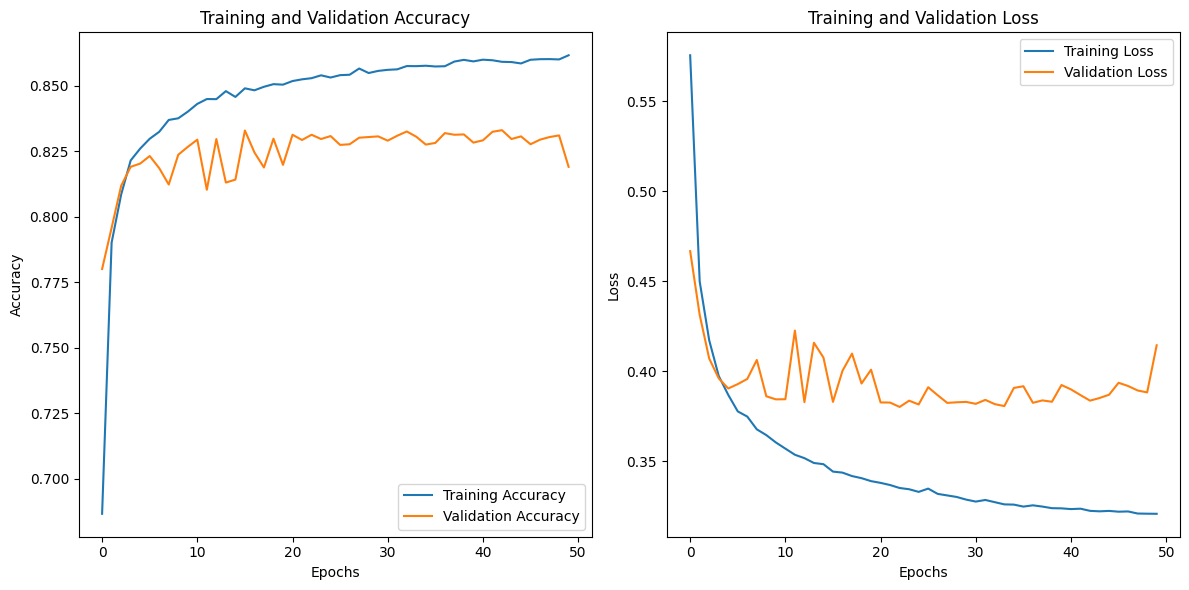

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout() 
plt.show()


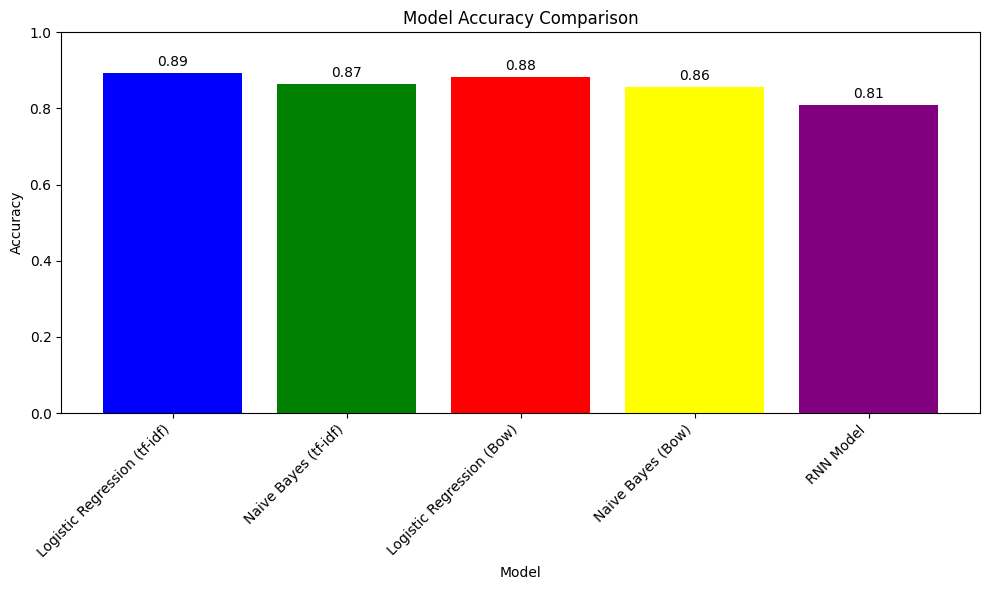

In [18]:

nn_accuracy = accuracy  

model_names = ['Logistic Regression (tf-idf)', 'Naive Bayes (tf-idf)', 'Logistic Regression (Bow)', 'Naive Bayes (Bow)', 'RNN Model']
accuracies = [lr_accuracy, nb_accuracy, logistic_accuracy, naive_accuracy, nn_accuracy]

plt.figure(figsize=(10, 6)) 
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'yellow', 'purple'])
plt.ylim(0, 1)  
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


 The NN model has less accuracy comparatively to logistic regression and naive Bayes.